[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/255ribeiro/curso_python_gis/blob/master/docs/geo_py/Teste_geopandas_ibge_censo_2022_v2.ipynb)




# Dados Geoespaciais


## Instalando o Ambiente

In [ ]:
!pip install geopandas shapely mapclassify libpysal splot esda pysal contextily
!pip install --upgrade pyshp
!pip install --upgrade descartes
!pip install --upgrade fiona


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


     ---------------------------------------- 0.0/58.1 kB ? eta -:--:--
     ------- -------------------------------- 10.2/58.1 kB ? eta -:--:--
     ------------- ------------------------ 20.5/58.1 kB 165.2 kB/s eta 0:00:01
     -------------------- ----------------- 30.7/58.1 kB 217.9 kB/s eta 0:00:01
     --------------------------------- ---- 51.2/58.1 kB 290.5 kB/s eta 0:00:01
     -------------------------------------- 58.1/58.1 kB 278.3 kB/s eta 0:00:00
   ---------------------------------------- 0.0/24.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/24.5 MB 2.0 MB/s eta 0:00:12
   ---------------------------------------- 0.2/24.5 MB 2.4 MB/s eta 0:00:11
    --------------------------------------- 0.3/24.5 MB 2.4 MB/s eta 0:00:11
    --------------------------------------- 0.6/24.5 MB 3.3 MB/s eta 0:00:08
   - -------------------------------------- 0.8/24.5 MB 3.6 MB/s eta 0:00:07
   - -------------------------------------- 0.9/24.5 MB 3.5 MB/s eta 0:00:07
   


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## Sobre os dados

Baixados em [https://www.ibge.gov.br/estatisticas/downloads-estatisticas.html](https://www.ibge.gov.br/estatisticas/downloads-estatisticas.html)

Dicionário de dados para Agregados preliminares por setores censitários:

[https://view.officeapps.live.com/op/view.aspx?src=https%3A%2F%2Fftp.ibge.gov.br%2FCensos%2FCenso_Demografico_2022%2FAgregados_por_Setores_Censitarios_preliminares%2Farquivos_complementares%2FDicionario_de_dados_agregados_preliminares.xlsx&wdOrigin=BROWSELINK](https://view.officeapps.live.com/op/view.aspx?src=https%3A%2F%2Fftp.ibge.gov.br%2FCensos%2FCenso_Demografico_2022%2FAgregados_por_Setores_Censitarios_preliminares%2Farquivos_complementares%2FDicionario_de_dados_agregados_preliminares.xlsx&wdOrigin=BROWSELINK)



## Dicionário de dados:

| **Nome da coluna** | **Tipo de dado** | **Tamanho** | **Descrição** |
| --- | --- | --- | --- |
| CD_SETOR | texto | 16 | Geocódigo de Setor Censitário |
| AREA_KM2 | real |  | Área do Setor Censitário em quilômetros quadrados |
| CD_REGIAO | numérico | 1 | Código das Grandes Regiões (Regiões Geográficas) |
| NM_REGIAO | texto | 15 | Nome das Grandes Regiões (Regiões Geográficas) |
| CD_UF | numérico | 2 | Código da Unidade da Federação |
| NM_UF | texto | 20 | Nome da Unidade da Federação |
| CD_MUN | numérico | 7 | Código do município |
| NM_MUN | texto | 50 | Nome do município |
| CD_DIST | numérico | 9 | Código do distrito |
| NM_DIST | texto | 50 | Nome do distrito |
| CD_SUBDIS | numérico | 11 | Código do subdistrito |
| NM_SUBDIST | texto | 50 | Nome do subdistrito |
| CD_MICRO | numérico | 5 | Código da microrregião |
| NM_MICRO | texto | 50 | Nome da microrregião |
| CD_MESO | numérico | 4 | Código da mesorregião |
| NM_MESO | texto | 50 | Nome da mesorregião |
| CD_RGI | numérico | 6 | Código da região geográfica imediata |
| NM_RGI | texto | 50 | Nome da região geográfica imediata |
| CD_RGINT | numérico | 4 | Código da região geográfica intermediária |
| NM_RGINT | texto | 50 | Nome da região geográfica intermediária |
| CD_CONCURB | numérico | 7 | Código da Concentração Urbana |
| NM_CONCURB | texto | 50 | Nome da Concentração Urbana |
| V0001 | numérico |  | Total de pessoas |
| V0002 | numérico |  | Total de Domicílios (DPPO + DPPV + DPPUO + DPIO + DCCM + DCSM) |
| V0003 | numérico |  | Total de Domicílios Particulares (DPPO + DPPV + DPPUO + DPIO) |
| V0004 | numérico |  | Total de Domicílios Coletivos (DCCM + DCSM) |
| V0005 | real |  | Média de moradores em Domicílios Particulares Ocupados (Total pessoas em Domicílios Particulares Ocupados / DPPO + DPIO) |
| V0006 | real |  | Percentual de Domicílios Particulares Ocupados Imputados (Total DPO imputados / Total DPO) |
| V0007 | numérico |  | Total de Domicílios Particulares Ocupados (DPPO + DPIO) |

## Importando pacotes

In [ ]:
import pandas as pd
import numpy as np
import zipfile

# para gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# para a análise de dados espaciais
import geopandas as gp

import mapclassify as mc
import contextily as cx

## Baixando Arquivos

In [ ]:
!wget https://255ribeiro.github.io/curso_python_gis/geo_py/BA_Malha_Preliminar_2022.zip


--2024-03-27 13:35:54--  https://255ribeiro.github.io/curso_python_gis/geo_py/BA_Malha_Preliminar_2022.zip
Resolving 255ribeiro.github.io (255ribeiro.github.io)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to 255ribeiro.github.io (255ribeiro.github.io)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 62263048 (59M) [application/zip]
Saving to: ‘BA_Malha_Preliminar_2022.zip’

BA_Malha_Preliminar 100%[===================>]  59.38M  86.3MB/s    in 0.7s    

2024-03-27 13:35:54 (86.3 MB/s) - ‘BA_Malha_Preliminar_2022.zip’ saved [62263048/62263048]



### Extraindo do arquivo zip

In [ ]:
with zipfile.ZipFile("BA_Malha_Preliminar_2022.zip", 'r') as zip_ref:
  zip_ref.extractall("./BA_Malha_Preliminar_2022")

## Carregando GeoJson

In [ ]:
df_geo = gp.read_file("./BA_Malha_Preliminar_2022/BA_Malha_Preliminar_2022.json")

## Informações do arquivo

In [ ]:
df_geo.shape

(30642, 30)

In [ ]:
df_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 30642 entries, 0 to 30641
Data columns (total 30 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   CD_SETOR    30642 non-null  object  
 1   AREA_KM2    30642 non-null  float64 
 2   CD_REGIAO   30642 non-null  object  
 3   NM_REGIAO   30642 non-null  object  
 4   CD_UF       30642 non-null  object  
 5   NM_UF       30642 non-null  object  
 6   CD_MUN      30642 non-null  object  
 7   NM_MUN      30642 non-null  object  
 8   CD_DIST     30642 non-null  object  
 9   NM_DIST     30642 non-null  object  
 10  CD_SUBDIST  30642 non-null  object  
 11  NM_SUBDIST  5491 non-null   object  
 12  CD_MICRO    30642 non-null  object  
 13  NM_MICRO    30642 non-null  object  
 14  CD_MESO     30642 non-null  object  
 15  NM_MESO     30642 non-null  object  
 16  CD_RGI      30642 non-null  object  
 17  NM_RGI      30642 non-null  object  
 18  CD_RGINT    30642 non-null  object  
 

In [ ]:
df_geo.describe()

AREA_KM2
count  30642.000000
mean      18.430926
std       54.460159
min        0.001235
25%        0.061144
50%        0.254225
75%        8.604529
max     1484.628804

In [ ]:
df_geo.head()


CD_SETOR  AREA_KM2 CD_REGIAO NM_REGIAO CD_UF  NM_UF   CD_MUN  \
0  290010805000001P  1.252312         2  Nordeste    29  Bahia  2900108   
1  290010805000002P  0.258089         2  Nordeste    29  Bahia  2900108   
2  290010805000003P  0.636238         2  Nordeste    29  Bahia  2900108   
3  290010805000004P  1.395440         2  Nordeste    29  Bahia  2900108   
4  290010805000005P  1.130747         2  Nordeste    29  Bahia  2900108   

   NM_MUN    CD_DIST NM_DIST  ... CD_CONCURB NM_CONCURB v0001 v0002 v0003  \
0  Abaíra  290010805  Abaíra  ...       None       None   807   421   419   
1  Abaíra  290010805  Abaíra  ...       None       None   416   234   234   
2  Abaíra  290010805  Abaíra  ...       None       None   681   392   392   
3  Abaíra  290010805  Abaíra  ...       None       None   626   344   344   
4  Abaíra  290010805  Abaíra  ...       None       None   276   159   159   

  v0004     v0005      v0006 v0007  \
0     2  2.668919   0.000000   296   
1     0  2.461538  11.834320   169   
2     0  2.522222   5.185185   270   
3     0  2.608333   2.083333   240   
4     0  2.732673   0.990099   101   

                                            geometry  
0  POLYGON ((-41.65404 -13.25992, -41.65423 -13.2...  
1  POLYGON ((-41.66355 -13.25025, -41.66425 -13.2...  
2  POLYGON ((-41.66645 -13.25044, -41.66702 -13.2...  
3  POLYGON ((-41.66355 -13.25025, -41.66345 -13.2...  
4  POLYGON ((-41.65110 -13.25848, -41.65082 -13.2...  

[5 rows x 30 columns]

In [ ]:
pd.set_option('display.max_columns', None)
df_geo.head()

CD_SETOR  AREA_KM2 CD_REGIAO NM_REGIAO CD_UF  NM_UF   CD_MUN  \
0  290010805000001P  1.252312         2  Nordeste    29  Bahia  2900108   
1  290010805000002P  0.258089         2  Nordeste    29  Bahia  2900108   
2  290010805000003P  0.636238         2  Nordeste    29  Bahia  2900108   
3  290010805000004P  1.395440         2  Nordeste    29  Bahia  2900108   
4  290010805000005P  1.130747         2  Nordeste    29  Bahia  2900108   

   NM_MUN    CD_DIST NM_DIST   CD_SUBDIST NM_SUBDIST CD_MICRO NM_MICRO  \
0  Abaíra  290010805  Abaíra  29001080500       None    29023   Seabra   
1  Abaíra  290010805  Abaíra  29001080500       None    29023   Seabra   
2  Abaíra  290010805  Abaíra  29001080500       None    29023   Seabra   
3  Abaíra  290010805  Abaíra  29001080500       None    29023   Seabra   
4  Abaíra  290010805  Abaíra  29001080500       None    29023   Seabra   

  CD_MESO            NM_MESO  CD_RGI   NM_RGI CD_RGINT              NM_RGINT  \
0    2906  Centro Sul Baiano  290013  Brumado     2904  Vitória da Conquista   
1    2906  Centro Sul Baiano  290013  Brumado     2904  Vitória da Conquista   
2    2906  Centro Sul Baiano  290013  Brumado     2904  Vitória da Conquista   
3    2906  Centro Sul Baiano  290013  Brumado     2904  Vitória da Conquista   
4    2906  Centro Sul Baiano  290013  Brumado     2904  Vitória da Conquista   

  CD_CONCURB NM_CONCURB v0001 v0002 v0003 v0004     v0005      v0006 v0007  \
0       None       None   807   421   419     2  2.668919   0.000000   296   
1       None       None   416   234   234     0  2.461538  11.834320   169   
2       None       None   681   392   392     0  2.522222   5.185185   270   
3       None       None   626   344   344     0  2.608333   2.083333   240   
4       None       None   276   159   159     0  2.732673   0.990099   101   

                                            geometry  
0  POLYGON ((-41.65404 -13.25992, -41.65423 -13.2...  
1  POLYGON ((-41.66355 -13.25025, -41.66425 -13.2...  
2  POLYGON ((-41.66645 -13.25044, -41.66702 -13.2...  
3  POLYGON ((-41.66355 -13.25025, -41.66345 -13.2...  
4  POLYGON ((-41.65110 -13.25848, -41.65082 -13.2...

## Plotagem com o geopandas

[https://geopandas.org/en/stable/docs/user_guide/mapping.html](https://geopandas.org/en/stable/docs/user_guide/mapping.html)

<Axes: >

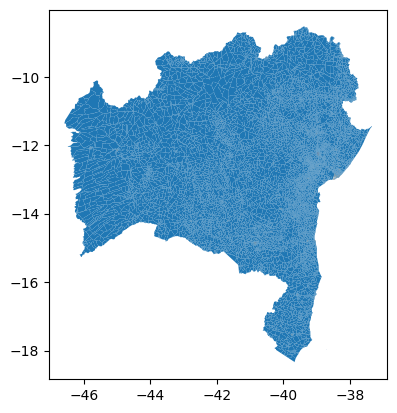

In [ ]:
df_geo.plot()

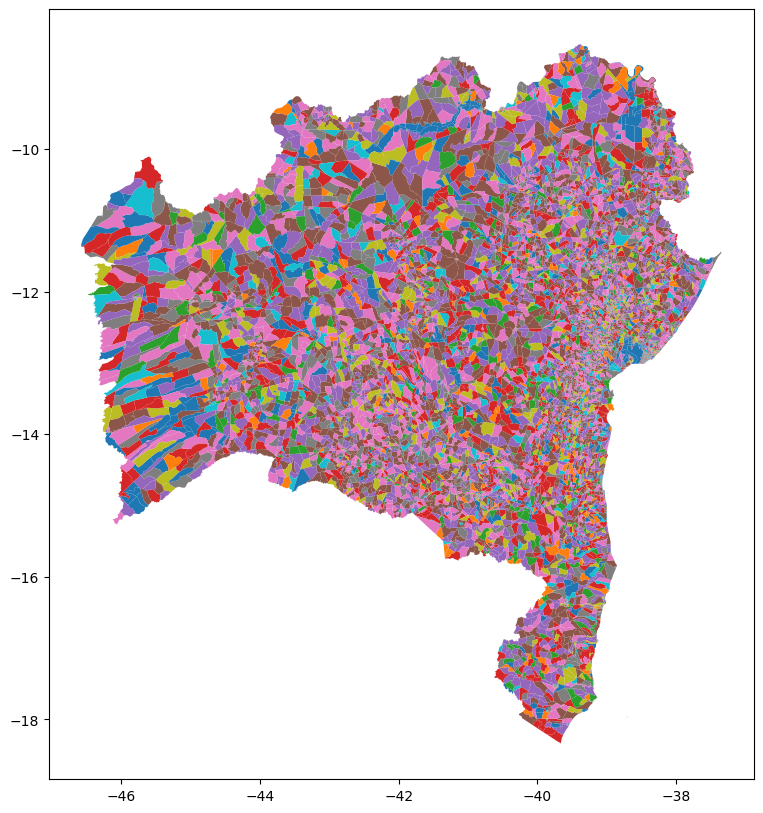

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

ax = df_geo.plot(ax=ax, column = "v0001")

fig.show()

<Axes: >

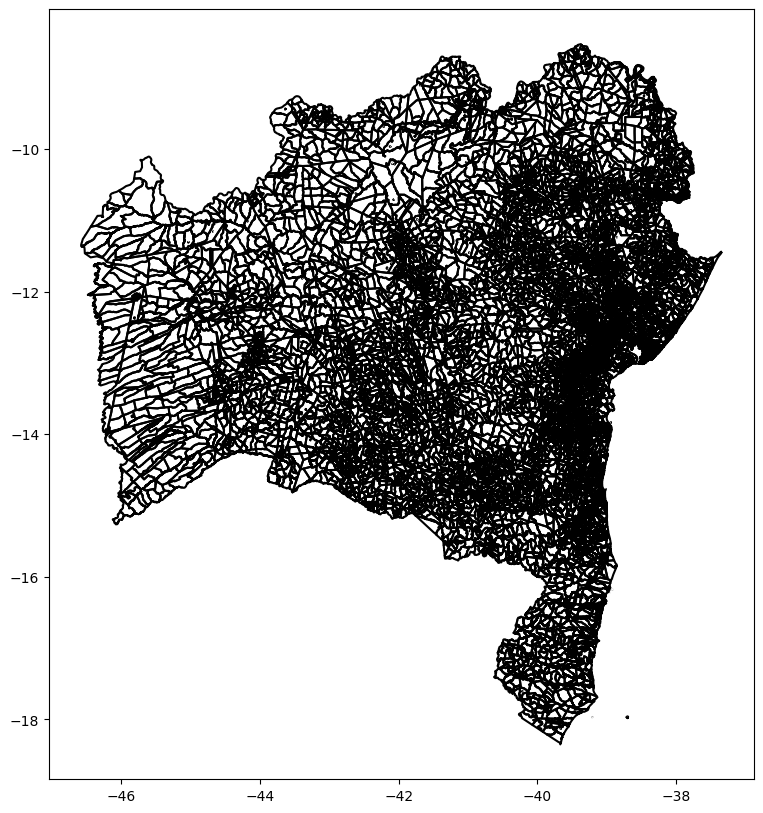

In [ ]:
df_geo.boundary.plot(figsize=(10,10), edgecolor="black")

<Axes: >

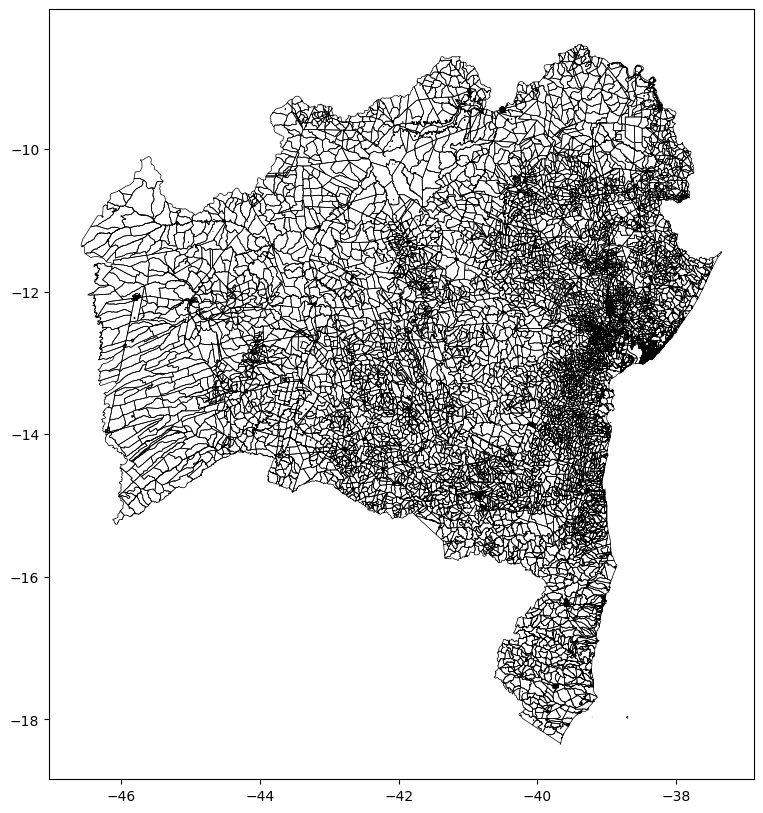

In [ ]:
df_geo.boundary.plot(figsize=(10,10), edgecolor="black", lw=.5)

## Tratando dados

In [ ]:
df_geo["v0001"] = df_geo["v0001"].astype(float)
df_geo["v0002"] = df_geo["v0002"].astype(float)
df_geo["v0003"] = df_geo["v0003"].astype(float)
df_geo["v0004"] = df_geo["v0004"].astype(float)
df_geo["v0005"] = df_geo["v0005"].astype(float)
df_geo["v0006"] = df_geo["v0006"].astype(float)
df_geo["v0007"] = df_geo["v0007"].astype(float)
# criado novas colunas
df_geo["desnidade_pop"] =  df_geo["v0001"]/df_geo["AREA_KM2"]

In [ ]:
df_geo.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 30642 entries, 0 to 30641
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   CD_SETOR       30642 non-null  object  
 1   AREA_KM2       30642 non-null  float64 
 2   CD_REGIAO      30642 non-null  object  
 3   NM_REGIAO      30642 non-null  object  
 4   CD_UF          30642 non-null  object  
 5   NM_UF          30642 non-null  object  
 6   CD_MUN         30642 non-null  object  
 7   NM_MUN         30642 non-null  object  
 8   CD_DIST        30642 non-null  object  
 9   NM_DIST        30642 non-null  object  
 10  CD_SUBDIST     30642 non-null  object  
 11  NM_SUBDIST     5491 non-null   object  
 12  CD_MICRO       30642 non-null  object  
 13  NM_MICRO       30642 non-null  object  
 14  CD_MESO        30642 non-null  object  
 15  NM_MESO        30642 non-null  object  
 16  CD_RGI         30642 non-null  object  
 17  NM_RGI         30642 no

In [ ]:
df_geo.describe()

AREA_KM2         v0001         v0002         v0003         v0004  \
count  30642.000000  30642.000000  30642.000000  30642.000000  30642.000000   
mean      18.430926    461.511194    224.417173    224.164447      0.252725   
std       54.460159    289.645276    131.152737    131.035016      1.539796   
min        0.001235      0.000000      0.000000      0.000000      0.000000   
25%        0.061144    248.000000    133.000000    133.000000      0.000000   
50%        0.254225    440.000000    216.000000    216.000000      0.000000   
75%        8.604529    629.000000    298.000000    298.000000      0.000000   
max     1484.628804   4253.000000   2170.000000   2170.000000    102.000000   

              v0005         v0006         v0007  desnidade_pop  
count  30642.000000  30642.000000  30642.000000   30642.000000  
mean       2.745468      2.032173    166.266497    6241.302646  
std        0.455014      3.254504    102.624350   10243.991791  
min        0.000000      0.000000      0.000000       0.000000  
25%        2.571429      0.000000     90.000000      24.972272  
50%        2.760000      0.921659    160.000000    1692.239809  
75%        2.956522      3.225806    228.000000    8179.894673  
max        8.000000    100.000000   1397.000000  171696.149844

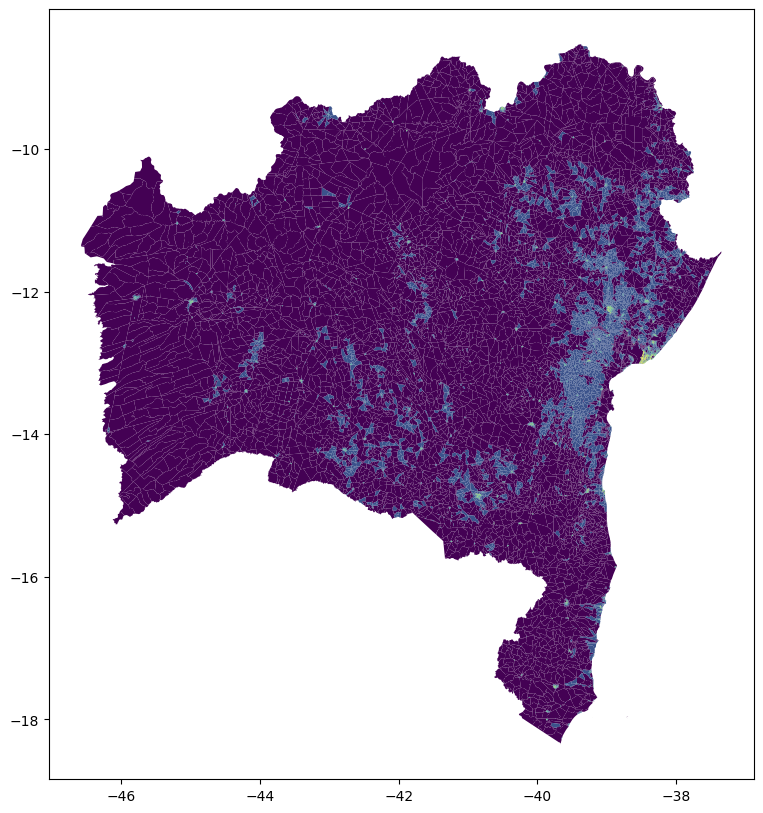

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

ax = df_geo.plot(ax=ax, column = "desnidade_pop",
                 scheme="quantiles",

                 legend_kwds={"title": "Habitantes por km²"}
                 )


## Ajustes de color maps
color maps padrão
[https://matplotlib.org/stable/users/explain/colors/colormaps.html](https://matplotlib.org/stable/users/explain/colors/colormaps.html)

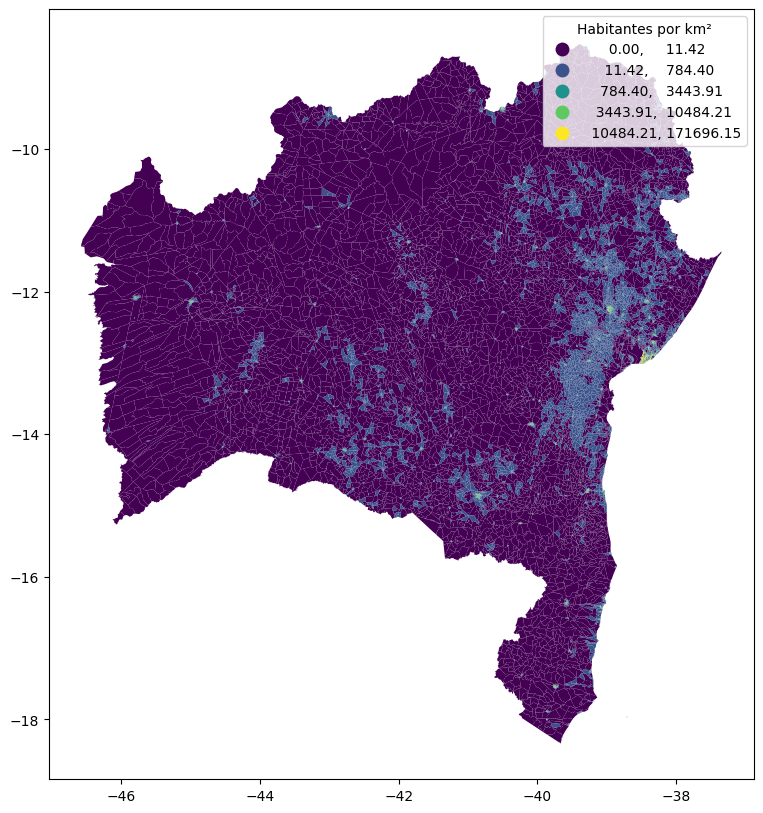

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

ax = df_geo.plot(ax=ax, column = "desnidade_pop",
                 scheme="quantiles",
                 cmap='viridis',
                 legend=True,
                 legend_kwds={"title": "Habitantes por km²"}
                 )


# Cmaps customizados
[https://matplotlib.org/stable/gallery/color/named_colors.html](https://matplotlib.org/stable/gallery/color/named_colors.html)



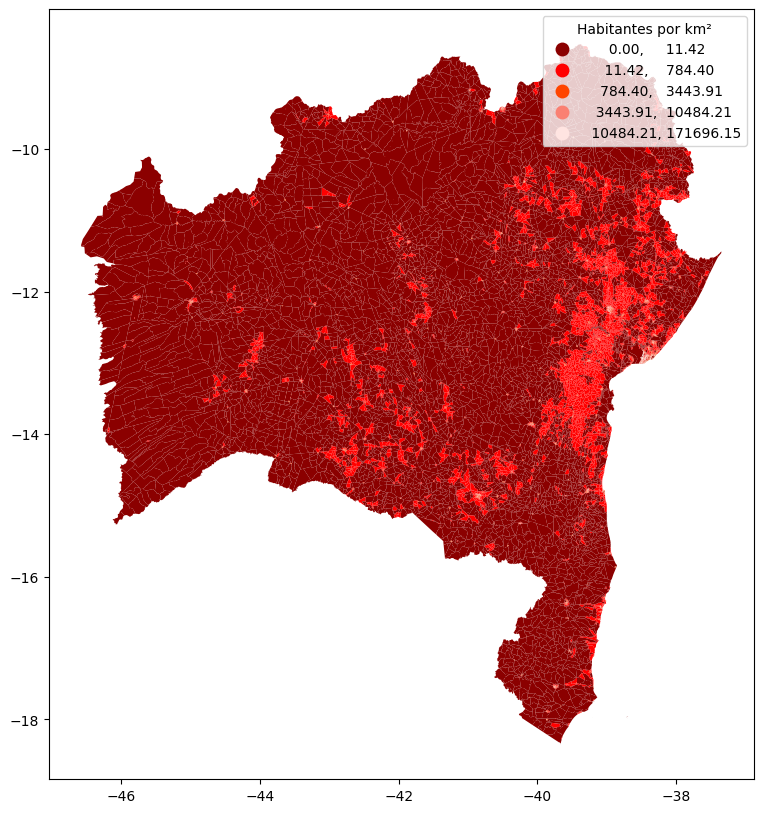

In [ ]:
from matplotlib import colors as mcolors

c_list = ["darkred","red","orangered", "salmon","mistyrose"]

c_map = mcolors.ListedColormap(c_list)

fig, ax = plt.subplots(figsize=(10,10))

ax = df_geo.plot(ax=ax, column = "desnidade_pop",
                 scheme="quantiles",
                 cmap=c_map,
                 legend=True,
                 legend_kwds={"title": "Habitantes por km²"}
                 )


usando seletores de cores da web
[https://coolors.co/](https://coolors.co/)

['#271f30', '#6c5a49', '#c8ad55', '#9bc59d', '#d0fcb3']


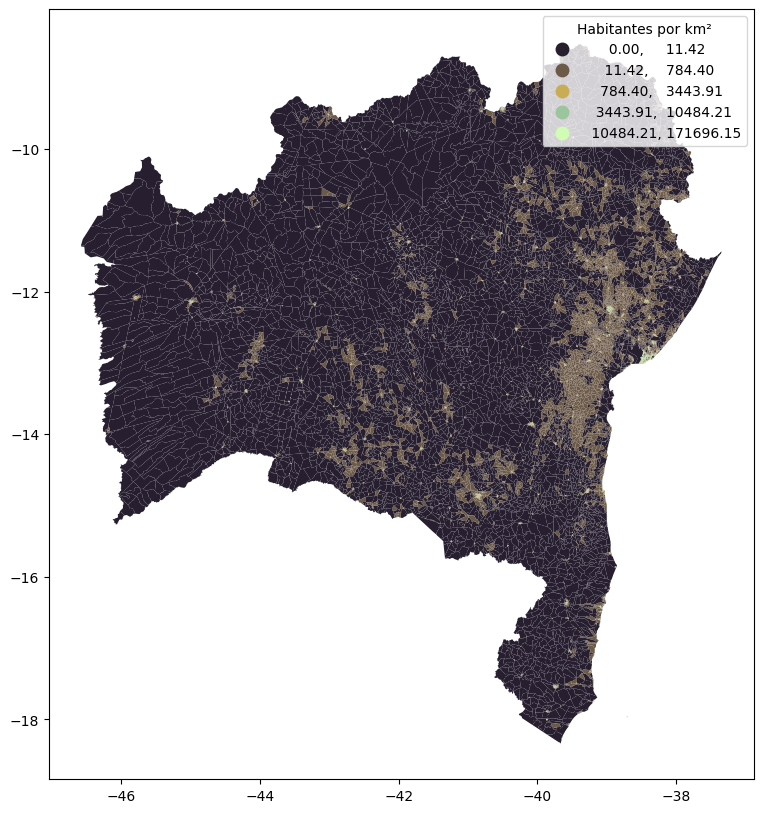

In [ ]:
c_list = ["#271f30","#6c5a49","#c8ad55","#9bc59d","#d0fcb3"]

#c_list.reverse()
# for i in range(len(c_list)):
#   if c_list[i][0]!= "#":
#     c_list[i] = "#" + c_list[i]

print(c_list)

c_map = mcolors.ListedColormap(c_list)


fig, ax = plt.subplots(figsize=(10,10))

ax = df_geo.plot(ax=ax, column = "desnidade_pop",
                 scheme="quantiles",
                 cmap=c_map,
                 legend=True,
                 legend_kwds={"title": "Habitantes por km²"}
                 )

## Filtrando mapa por valor de coluna

In [ ]:
fltr = df_geo["NM_MUN"] == "Salvador"
df_geo_ssa = df_geo[fltr]
df_geo_ssa.shape, df_geo.shape

((4552, 31), (30642, 31))

In [ ]:
df_geo_ssa.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 4552 entries, 20719 to 25270
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   CD_SETOR       4552 non-null   object  
 1   AREA_KM2       4552 non-null   float64 
 2   CD_REGIAO      4552 non-null   object  
 3   NM_REGIAO      4552 non-null   object  
 4   CD_UF          4552 non-null   object  
 5   NM_UF          4552 non-null   object  
 6   CD_MUN         4552 non-null   object  
 7   NM_MUN         4552 non-null   object  
 8   CD_DIST        4552 non-null   object  
 9   NM_DIST        4552 non-null   object  
 10  CD_SUBDIST     4552 non-null   object  
 11  NM_SUBDIST     4552 non-null   object  
 12  CD_MICRO       4552 non-null   object  
 13  NM_MICRO       4552 non-null   object  
 14  CD_MESO        4552 non-null   object  
 15  NM_MESO        4552 non-null   object  
 16  CD_RGI         4552 non-null   object  
 17  NM_RGI         4552 

<Axes: >

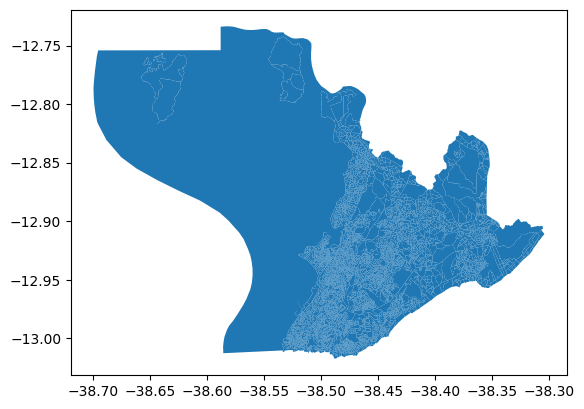

In [ ]:
df_geo_ssa.plot()

## Sistema de coordenadas

[https://www.earthdatascience.org/courses/earth-analytics/spatial-data-r/intro-to-coordinate-reference-systems/](https://www.earthdatascience.org/courses/earth-analytics/spatial-data-r/intro-to-coordinate-reference-systems/)

In [ ]:
df_geo_ssa.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [ ]:
df_geo_ssa = df_geo_ssa.to_crs("31984")
df_geo_ssa.crs

<Projected CRS: EPSG:31984>
Name: SIRGAS 2000 / UTM zone 24S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Brazil - between 42°W and 36°W, northern and southern hemispheres, onshore and offshore.
- bounds: (-42.0, -26.35, -36.0, 0.74)
Coordinate Operation:
- name: UTM zone 24S
- method: Transverse Mercator
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

## Gravando Geojson

In [ ]:
with open("SSA_BA_Malha_Preliminar_2022.json" , 'w') as file:
    file.write(df_geo_ssa.to_json())

## Abrindo GeoJson

In [ ]:
df_2 = gp.read_file("SSA_BA_Malha_Preliminar_2022.json")
df_2.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4552 entries, 0 to 4551
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   id             4552 non-null   object  
 1   CD_SETOR       4552 non-null   object  
 2   AREA_KM2       4552 non-null   float64 
 3   CD_REGIAO      4552 non-null   object  
 4   NM_REGIAO      4552 non-null   object  
 5   CD_UF          4552 non-null   object  
 6   NM_UF          4552 non-null   object  
 7   CD_MUN         4552 non-null   object  
 8   NM_MUN         4552 non-null   object  
 9   CD_DIST        4552 non-null   object  
 10  NM_DIST        4552 non-null   object  
 11  CD_SUBDIST     4552 non-null   object  
 12  NM_SUBDIST     4552 non-null   object  
 13  CD_MICRO       4552 non-null   object  
 14  NM_MICRO       4552 non-null   object  
 15  CD_MESO        4552 non-null   object  
 16  NM_MESO        4552 non-null   object  
 17  CD_RGI         4552 non-n

<Axes: >

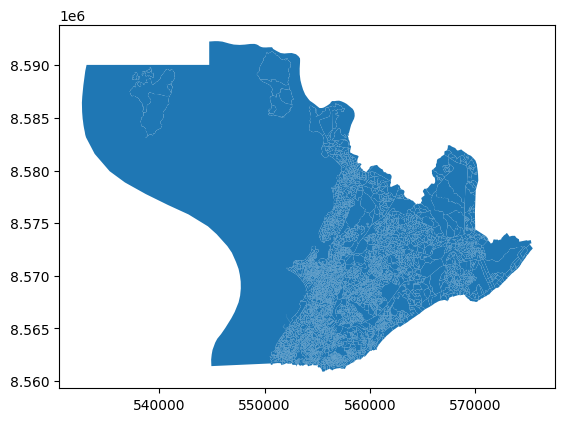

In [ ]:
df_2.plot()

## Eliminando feição indesejada

### Identificando feição indesejada -método 1

In [ ]:
df_2['coords'] = df_2['geometry'].apply(lambda x: x.representative_point().coords[0])

In [ ]:
df_2['coords']

0       (555517.6892997203, 8561162.794243902)
1        (555869.385196075, 8561221.765203156)
2          (555561.692228948, 8561448.0105288)
3        (555666.401386929, 8561893.694598991)
4       (555818.1373583635, 8561625.594414245)
                         ...                  
4547    (554137.1694208445, 8563500.747517455)
4548    (551078.8695353717, 8562426.471542083)
4549    (551215.1880186847, 8562493.736728266)
4550    (552074.8722883032, 8564677.217530191)
4551    (551955.4441563855, 8564454.894890044)
Name: coords, Length: 4552, dtype: object

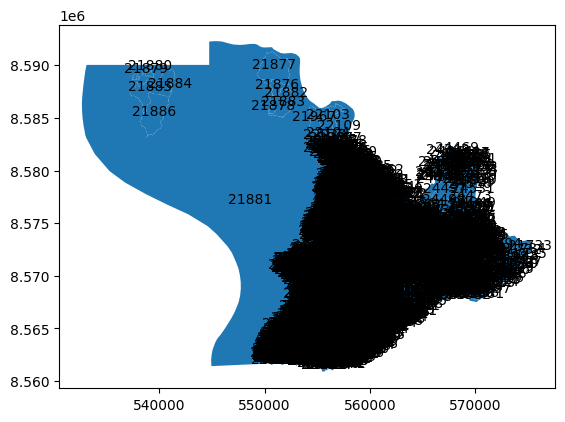

In [ ]:
df_2.plot()
for idx, row in df_2.iterrows():
    plt.annotate(text=row['id'], xy=row['coords'],
                 horizontalalignment='center')

### Identificando feição indesejada - médodo 2

In [ ]:
df_2['AREA_KM2'].max()

386.114232

((1, 33), array(['21881'], dtype=object))

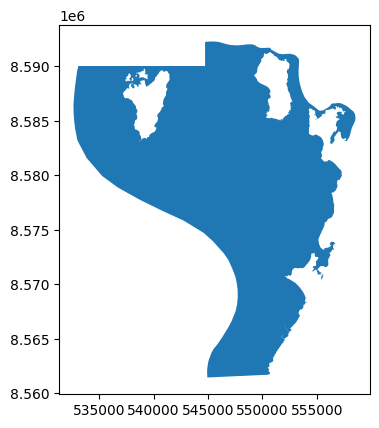

In [ ]:
fltr = df_2['AREA_KM2'] == df_2['AREA_KM2'].max()
df_2[fltr].plot()
df_2[fltr].shape, df_2[fltr]["id"].values

### Eliminado feição indesejada

In [ ]:
fltr = df_2["id"] != "21881"
df_2 = df_2[fltr]

Gerando mapa

<Axes: >

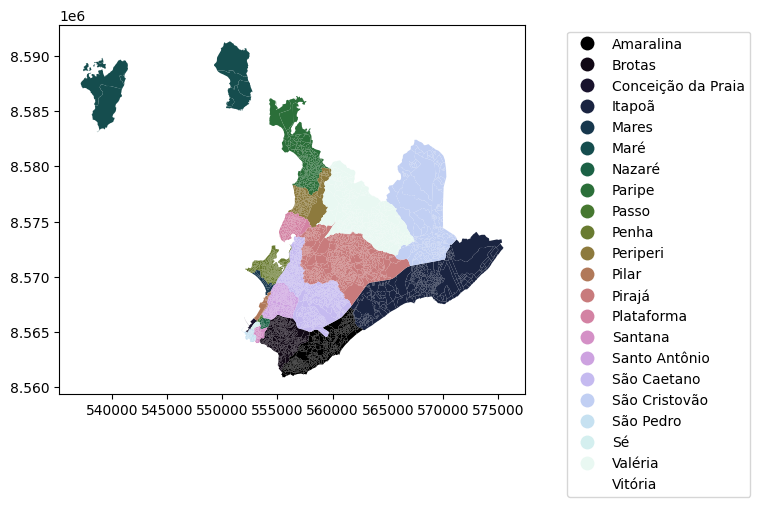

In [ ]:
fig, ax = plt.subplots(1)
df_2.plot(ax = ax, column="NM_SUBDIST" ,cmap="cubehelix", legend=True, legend_kwds={'bbox_to_anchor': (1.5, 1)})


## Agregando com dissolve
[https://geopandas.org/en/stable/docs/user_guide/aggregation_with_dissolve.html](https://geopandas.org/en/stable/docs/user_guide/aggregation_with_dissolve.html)

In [ ]:
df_3 = df_2[['NM_SUBDIST', "v0001",'v0005', "geometry"]]
df_3 = df_3.dissolve(by='NM_SUBDIST', aggfunc='sum', as_index=False)

df_3.head()

NM_SUBDIST                                           geometry  \
0           Amaralina  POLYGON ((555768.884 8561020.182, 555765.446 8...   
1              Brotas  POLYGON ((554383.205 8563533.513, 554358.146 8...   
2  Conceição da Praia  POLYGON ((552582.398 8565306.142, 552579.429 8...   
3              Itapoã  POLYGON ((563322.057 8565454.801, 563258.583 8...   
4               Mares  POLYGON ((553634.123 8569419.347, 553605.637 8...   

      v0001        v0005  
0  254133.0  1138.743352  
1  178577.0   900.154859  
2     416.0     4.270202  
3  191205.0   805.219044  
4    3314.0    37.887135

(array([535000., 540000., 545000., 550000., 555000., 560000., 565000.,
        570000., 575000., 580000.]),
 [Text(535000.0, 0, '535000'),
  Text(540000.0, 0, '540000'),
  Text(545000.0, 0, '545000'),
  Text(550000.0, 0, '550000'),
  Text(555000.0, 0, '555000'),
  Text(560000.0, 0, '560000'),
  Text(565000.0, 0, '565000'),
  Text(570000.0, 0, '570000'),
  Text(575000.0, 0, '575000'),
  Text(580000.0, 0, '580000')])

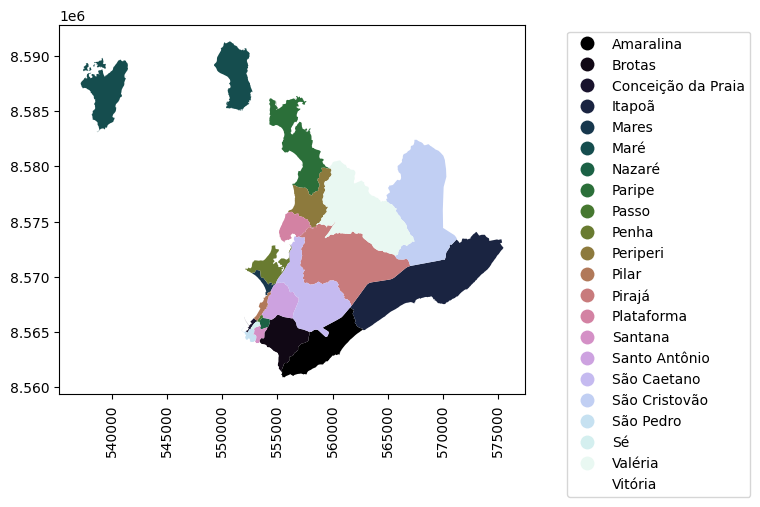

In [ ]:
fig, ax = plt.subplots(1)
df_3.plot(ax = ax,column="NM_SUBDIST", cmap="cubehelix", legend=True, legend_kwds={'bbox_to_anchor': (1.5, 1)})
plt.xticks(rotation=90)

## Colocando imagens de fundo

[https://geopandas.org/en/stable/gallery/plotting_basemap_background.html](https://geopandas.org/en/stable/gallery/plotting_basemap_background.html)

[https://contextily.readthedocs.io/en/latest/](https://contextily.readthedocs.io/en/latest/)

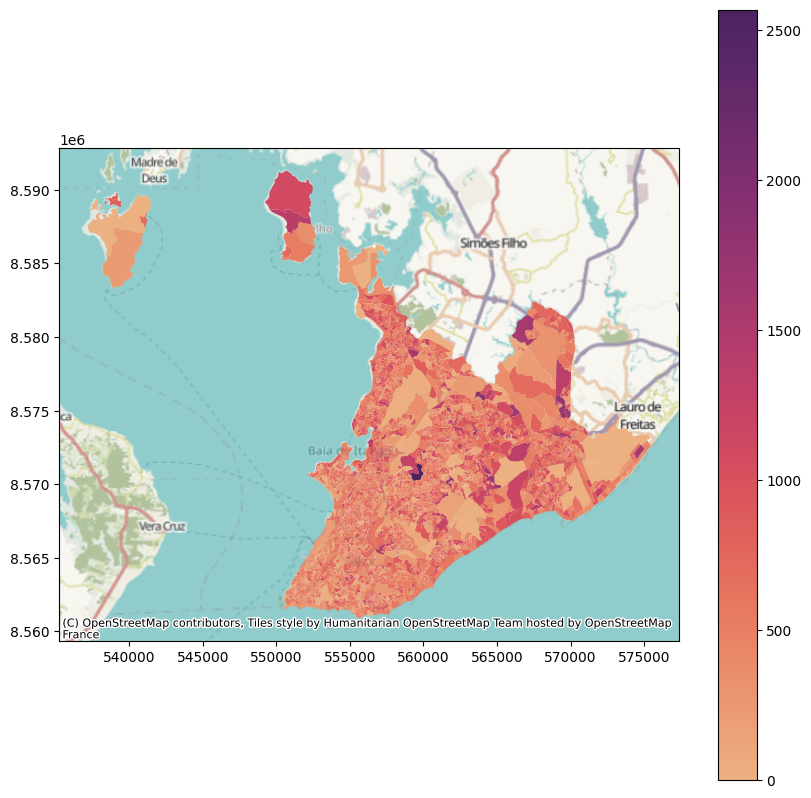

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,10))
df_2.plot(ax = ax, column="v0001", cmap='flare',legend=True )
cx.add_basemap(ax=ax, crs=df_2.crs)

In [ ]:
# Listas de provedores de mapas online
cx.providers

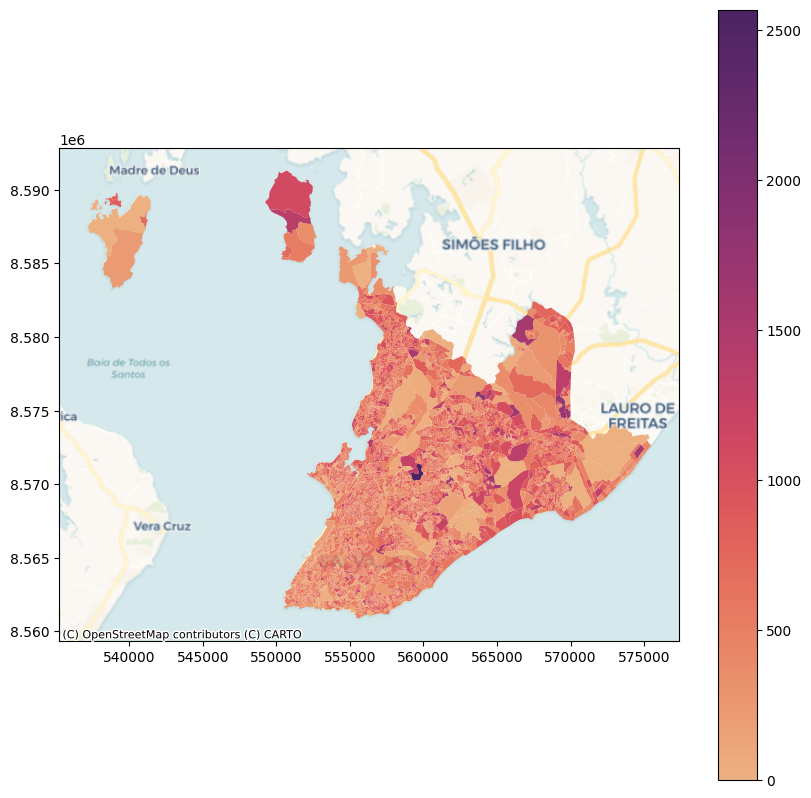

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,10))
df_2.plot(ax = ax, column="v0001", cmap='flare',legend=True )
cx.add_basemap(ax=ax, source=cx.providers.CartoDB.Voyager ,  crs=df_2.crs)

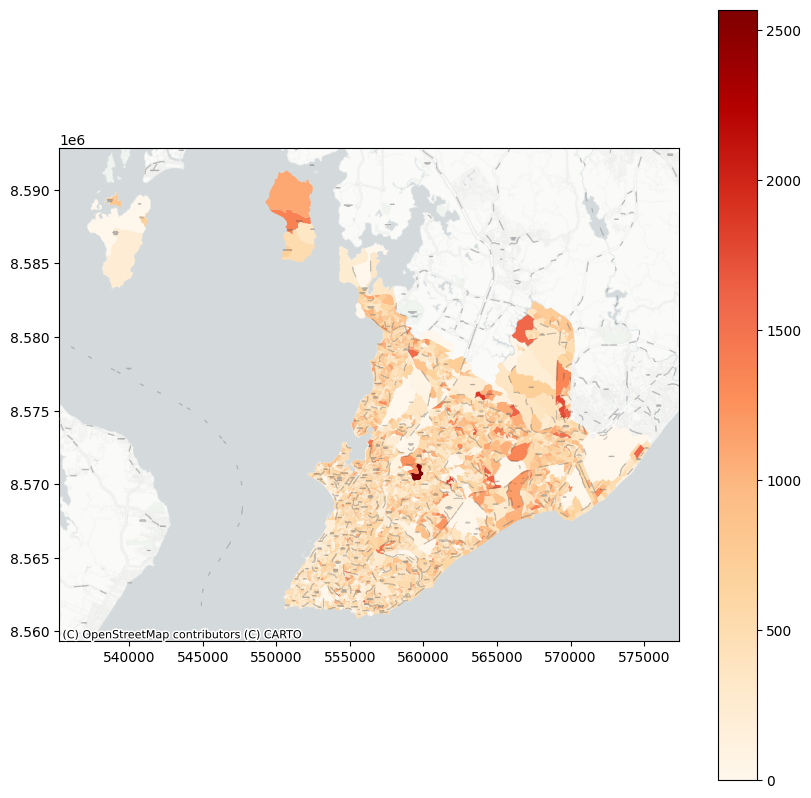

In [ ]:
fig, ax = plt.subplots(1, figsize=(10,10))
df_2.plot(ax = ax, column="v0001", cmap='OrRd',legend=True )
cx.add_basemap(ax, source=cx.providers.CartoDB.PositronNoLabels, zoom=12, crs=df_2.crs)
cx.add_basemap(ax, source=cx.providers.CartoDB.PositronOnlyLabels, zoom=15, crs=df_2.crs)

## Marcando um ponto por corrdenadas

### Abra o Google Earth

[https://earth.google.com/web/](https://earth.google.com/web/)

Marque um ponto de localização do seu terreno

In [ ]:
from shapely.geometry import Point
# substitua os valores de latitue e longitude pelos valores do seu ponto
# use pontos para separar os decimais
lat = 0
lon = 0
pt_terreno = Point(lon, lat)

aplicando sistema de coordenads

In [ ]:
loc_terreno= gp.GeoDataFrame([1], geometry=[pt_terreno], crs="EPSG:4326")

In [ ]:
loc_terreno.head()

0                     geometry
0  1  POINT (-38.43202 -12.97391)

In [ ]:
loc_terreno = loc_terreno.to_crs(df_2.crs)

(array([535000., 540000., 545000., 550000., 555000., 560000., 565000.,
        570000., 575000., 580000.]),
 [Text(535000.0, 0, '535000'),
  Text(540000.0, 0, '540000'),
  Text(545000.0, 0, '545000'),
  Text(550000.0, 0, '550000'),
  Text(555000.0, 0, '555000'),
  Text(560000.0, 0, '560000'),
  Text(565000.0, 0, '565000'),
  Text(570000.0, 0, '570000'),
  Text(575000.0, 0, '575000'),
  Text(580000.0, 0, '580000')])

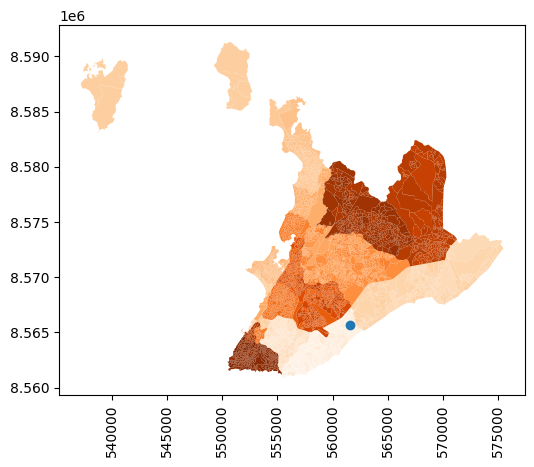

In [ ]:
fig, ax = plt.subplots()

df_2.plot(ax=ax, cmap="Oranges")
loc_terreno.plot(ax=ax)
plt.xticks(rotation=90)

In [ ]:
entorno = loc_terreno.buffer(1000)

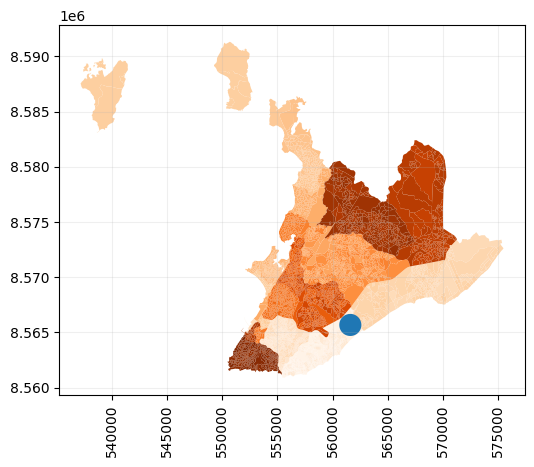

In [ ]:
fig, ax = plt.subplots()
plt.grid(alpha = .2)
df_2.plot(ax=ax, cmap="Oranges")
entorno.plot(ax=ax)

plt.xticks(rotation=90)
fig.show()

### Intersects e Overlaps
[https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.intersects.html](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.intersects.html)
[https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.overlaps.html](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.overlaps.html)

In [ ]:
fltr = df_2.intersects(entorno[0])
df_4 = df_2[fltr]

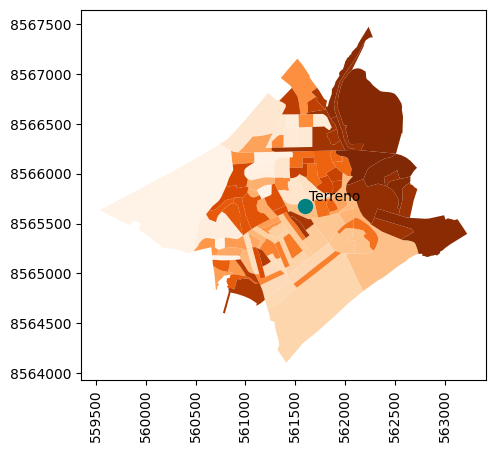

In [ ]:
fig, ax = plt.subplots()
df_4.plot(ax=ax, cmap="Oranges")
loc_terreno.plot(ax=ax, marker='o', color='teal', markersize=100)
ax.annotate("Terreno", xy= (loc_terreno.geometry.x, loc_terreno.geometry.y), xytext=(3, 3), textcoords="offset points")
plt.xticks(rotation=90)
ax.ticklabel_format(style='plain')
#salvando figura
fig.savefig('./entorno.svg')
fig.show()